In [5]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from textblob import TextBlob

import pandas as pd
pd.set_option('display.max_colwidth', -1)

def detect_polarity(text):
    return TextBlob(text).sentiment.polarity

def label_polarity(x):
    if ((x > 0)&(x<=0.1)):
        return 'Neutral'
    elif x > 0.1:
        return 'Positive'
    else:
        return 'Negative'

df = pd.read_csv('desktop/tesla-model_3-2018.csv', names=['review'])
df['polarity_percentage'] = df['review'].apply(detect_polarity)
df['polarity'] = df['polarity_percentage'].apply(label_polarity)
df['polarity_neutral'] = df['polarity_percentage'].apply(lambda x: True if ((x > 0)&(x<=0.1)) else False)
df['polarity_negative'] = df['polarity_percentage'].apply(lambda x: True if x <= 0 else False)
df['polarity_positive'] = df['polarity_percentage'].apply(lambda x: True if x > 0.1 else False)
df['blob'] = df['review'].apply(lambda x: TextBlob(x).noun_phrases)


     
cols = ['blob','polarity','polarity_negative','polarity_positive','polarity_neutral','review']
df = df[cols] 

In [6]:
df['polarity_positive'].value_counts()[1]


73

In [24]:
 df['polarity_negative'].value_counts()[1]

11

In [23]:
df['polarity_neutral'].value_counts()[1]

8

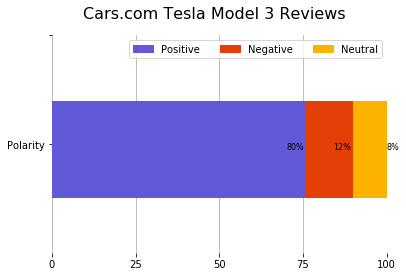

In [31]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots()

start = 0
never = 76
seldom = 14
undecided = 8

ax.broken_barh([(start, never), (never, never+seldom), (never+seldom, never+seldom+undecided)], [10, 9], facecolors=('#6259D8', '#E53F08', '#FDB200'))
ax.set_ylim(5, 15)
ax.set_xlim(0, 100)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([15, 25])
ax.set_xticks([0, 25, 50, 75, 100])

ax.set_axisbelow(True) 

ax.set_yticklabels(['Polarity'])
ax.grid(axis='x')
ax.text(never-6, 14.5, "80%", fontsize=8)
ax.text((never+seldom)-6, 14.5, "12%", fontsize=8)
ax.text((never+seldom+undecided)+2, 14.5, "8%", fontsize=8)

fig.suptitle('Cars.com Tesla Model 3 Reviews', fontsize=16)

leg1 = mpatches.Patch(color='#6259D8', label='Positive')
leg2 = mpatches.Patch(color='#E53F08', label='Negative')
leg3 = mpatches.Patch(color='#FDB200', label='Neutral')
ax.legend(handles=[leg1, leg2, leg3], ncol=3)

plt.show()

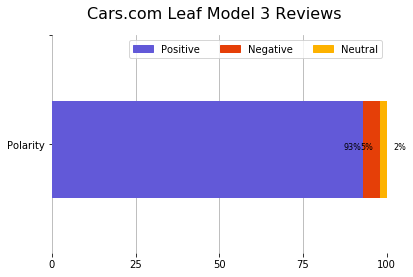

In [38]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots()

start = 0
never = 93
seldom = 5
undecided= 2

ax.broken_barh([(start, never), (never, never+seldom), (never+seldom, never+seldom+undecided)], [10, 9], facecolors=('#6259D8', '#E53F08', '#FDB200'))
ax.set_ylim(5, 15)
ax.set_xlim(0, 100)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([15, 25])
ax.set_xticks([0, 25, 50, 75, 100])

ax.set_axisbelow(True) 

ax.set_yticklabels(['Polarity'])
ax.grid(axis='x')
ax.text(never-6, 14.5, "93%", fontsize=8)
ax.text((never+seldom)-6, 14.5, "5%", fontsize=8)
ax.text((never+seldom+undecided)+2, 14.5, "2%", fontsize=8)

fig.suptitle('Cars.com Leaf Model 3 Reviews', fontsize=16)

leg1 = mpatches.Patch(color='#6259D8', label='Positive')
leg2 = mpatches.Patch(color='#E53F08', label='Negative')
leg3 = mpatches.Patch(color='#FDB200', label='Neutral')
ax.legend(handles=[leg1, leg2, leg3], ncol=3)

plt.show()

46+54

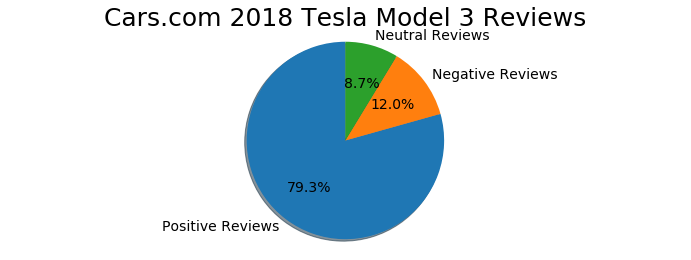

In [81]:
fig5, ax5 = plt.subplots(figsize=(12,4))

label = ['Positive Reviews', 'Negative Reviews', 'Neutral Reviews']
size = [73,11,8]

ax5.pie(size,labels= label,textprops={'fontsize': 14},autopct='%1.1f%%',shadow=True, startangle=90)
ax5.axis('equal') 
ax5.set_title('Cars.com 2018 Tesla Model 3 Reviews',size = 25)
plt.show()

In [62]:
def detect_polarity(text):
    return TextBlob(text).sentiment.polarity

df = pd.read_csv('desktop/nissan-leaf-2018.csv', names=['review'])
df['polarity'] = df['review'].apply(detect_polarity)
df['polarity_neutral'] = df['polarity'].apply(lambda x: True if ((x > 0)&(x<=0.1)) else False)
df['polarity_negative'] = df['polarity'].apply(lambda x: True if x <= 0 else False)
df['polarity_positive'] = df['polarity'].apply(lambda x: True if x > 0.1 else False)
df['blob'] = df['review'].apply(lambda x: TextBlob(x).noun_phrases)

cols = ['blob','polarity','polarity_negative','polarity_positive','polarity_neutral','review']
df = df[cols] 

In [69]:
df['polarity_positive'].value_counts() 

True     26
False    2 
Name: polarity_positive, dtype: int64

In [70]:
 df['polarity_negative'].value_counts()

False    27
True     1 
Name: polarity_negative, dtype: int64

In [71]:
df['polarity_neutral'].value_counts()

False    27
True     1 
Name: polarity_neutral, dtype: int64

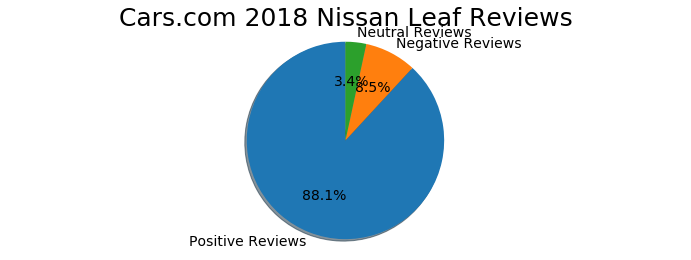

In [120]:
fig, ax = plt.subplots(figsize=(12,4))

label = ['Positive Reviews','Negative Reviews', 'Neutral Reviews']
size = [26,2.5,1]

ax.pie(size,labels= label,textprops={'fontsize': 14},autopct='%1.1f%%',shadow=True, startangle=90)
ax.axis('equal') 
ax.set_title('Cars.com 2018 Nissan Leaf Reviews',size = 25)
plt.show()

In [90]:
df = pd.read_csv('desktop/tweets_by_green_cars.csv', names=['review'])

In [113]:
df = df[df['review'].str.contains('Tesla')]

In [115]:
def detect_polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity'] = df['review'].apply(detect_polarity)
df['polarity_neutral'] = df['polarity'].apply(lambda x: True if ((x > 0)&(x<=0.1)) else False)
df['polarity_negative'] = df['polarity'].apply(lambda x: True if x <= 0 else False)
df['polarity_positive'] = df['polarity'].apply(lambda x: True if x > 0.1 else False)
df['blob'] = df['review'].apply(lambda x: TextBlob(x).noun_phrases)

cols = ['blob','polarity','polarity_negative','polarity_positive','polarity_neutral','review']
df = df[cols]
df

,,,,blob,polarity,polarity_negative,polarity_positive,polarity_neutral,review
1213448253934469120,2020-01-04 13:13:03,5,1,"[plug-in, tesla, rivian, car, buy, reverse, //t.co/7bqhmmpfwy https]",1.000000,False,True,False,"Plug-in hybrids, Tesla surge, Rivian funding, Best Car To Buy: The Week in Reverse https://t.co/7BqhmMPFWy https://t.co/NaIzbgkh9l"
1213143876845727745,2020-01-03 17:03:34,0,0,"[tesla, ’ s, global gains, honda, ’ s hybrid, bmw, ’ s, model, ’ s, car, news https, //t.co/2ph28l9rau https]",0.000000,True,False,False,"Tesla’s global gains, Honda’s hybrid push, BMW’s Model S: Today’s Car News https://t.co/2ph28l9raU https://t.co/UbKTUOhT4S"
1213135823727517700,2020-01-03 16:31:34,7,1,"[tesla, growth https, //t.co/z84pbrcfvs https]",0.216667,False,True,False,"Tesla rings in 2020 with a global manufacturing presence, strong 2019 growth https://t.co/z84pBrcfVs https://t.co/3qWEUx0cIU"
1213130545296621568,2020-01-03 16:10:35,5,2,"[tesla, strong growth, //t.co/o9b2t4pg9u https]",0.216667,False,True,False,"Tesla rings in 2020 with a global manufacturing presence, strong growth in 2019 https://t.co/O9b2t4pG9u https://t.co/4UsbTyShql"
1213100167127277570,2020-01-03 14:09:52,0,0,"[@ ceo_plus_ch, model x, eligible contender, tesla]",0.000000,True,False,False,@ceo_plus_ch Model X wasn't an eligible contender this year. No Tesla was.
1213084736161112064,2020-01-03 13:08:33,2,1,"[tesla, presence https, //t.co/2diymby6nl https]",0.000000,True,False,False,Tesla rings in 2020 with a global manufacturing presence https://t.co/2dIyMBy6Nl https://t.co/X1a38PuYHO
1211635942659776514,2019-12-30 13:11:34,21,3,"[car, reports ’, car, decade, tesla model, s https, //t.co/3udcw2btfg https]",-0.200000,True,False,False,Green Car Reports’ Car of the Decade: Tesla Model S https://t.co/3UdCw2BTFG https://t.co/3vNeurTACP
1208071581798264832,2019-12-20 17:08:04,0,0,"[diesel jeep mpg, bmw, suv, teslas, ’ s, car, news https, //t.co/ndpkteqm61 https]",0.500000,False,True,False,"Diesel Jeep MPG, BMW iX3 electric SUV, more places for Teslas to charge: Today’s Car News https://t.co/ndpkTeQm61 https://t.co/GEOULufU6R"
1208009677360861184,2019-12-20 13:02:05,12,3,"[evgo, tesla, year https, //t.co/ea70ewqgja https]",0.100000,False,False,True,EVgo fast charging network will offer Tesla connectors nationally next year https://t.co/eA70EwQgja https://t.co/PpudumOSRz
1204444930799587328,2019-12-10 16:57:03,1,1,"[mitsubishi, i-miev recall, tesla, porsche taycan, ’ s, car, news https, //t.co/vcth0alubq https]",0.000000,True,False,False,"Mitsubishi i-MiEV recall, Tesla lasers, Porsche Taycan charging: Today’s Car News https://t.co/VCTh0aLUBQ https://t.co/CVn3tlBdP9"


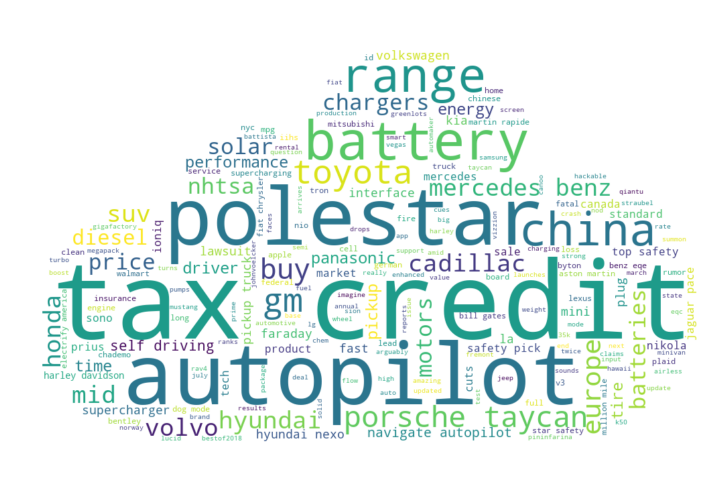

In [112]:
def df_to_list(df):
    nouns_tesla = []
    for index,row in df.iterrows():
        nouns_tesla.extend(row['blob'])    
    return nouns_tesla


def filter_words(text):
    if( 'tesla' in text or 'model' in text or "n't" in text or 'car' in text or 'bmw' in text
    or 'vehicle' in text or 'great' in text or 'leaf' in text or 'nissan' in text or 'https' in text
      or 'co' in text or 'headlines' in text or 'tsla' in text or 'ev' in text or 'ford' in text 
       or 'electric' in text or 'new' in text or 'musk' in text or 'twitter' in text or 'vw' in text
      or 'rivian' in text or 'https' in text or 'california' in text or 'epa' in text or 'hybrid' in text
      or 'audi' in text):
        return ''
    else:
        return text

def word_cloud(wd_list):
    wave_mask = np.array(Image.open("desktop/cloud.jpg"))
    stop_words = set(stopwords.words("english"))
    all_words = ' '.join([filter_words(text) for text in wd_list])
    wordcloud = WordCloud(
        mask=wave_mask,
        background_color='white',
        stopwords=stop_words,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear")
    
wordcloud_list1 = df_to_list(df)
#wordcloud_list2 = df_to_list(df2)

word_cloud(wordcloud_list1)
#word_cloud(wordcloud_list2)
